In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras

In [127]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [128]:
x_train = x_train/255
x_test = x_test/255

In [139]:
x_train.shape

(60000, 28, 28)

In [152]:
model = keras.Sequential([
      keras.layers.Flatten(input_shape=(28,28)),
      keras.layers.Dense(10,activation='softmax')
      ])

def compile_model(model):
  opt = tf.keras.optimizers.RMSprop()
  model.compile(
      optimizer=opt,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
      )
  return(model.fit(x_train, y_train, epochs=5,
                   validation_data=(x_test,y_test)))

In [153]:
compile_model(model)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4423 - accuracy: 0.8824 - val_loss: 0.3041 - val_accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3039 - accuracy: 0.9155 - val_loss: 0.2904 - val_accuracy: 0.9199
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2903 - accuracy: 0.9198 - val_loss: 0.2823 - val_accuracy: 0.9258
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2838 - accuracy: 0.9225 - val_loss: 0.2777 - val_accuracy: 0.9253
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2801 - accuracy: 0.9245 - val_loss: 0.2780 - val_accuracy: 0.9255


In [154]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2780 - accuracy: 0.9255


[0.27803951501846313, 0.9254999756813049]

In [158]:
pred = model.predict(x_test)

313/313 [==============================] - 2s 8ms/step


In [159]:
predicted_values = [np.argmax(i) for i in pred]

In [91]:
print(predicted_values)
y_test[:5]

[7, 2, 1, 0, 4]


array([7, 2, 1, 0, 4], dtype=uint8)

In [155]:
model0 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

compile_model(model0)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1875 - accuracy: 0.9433 - val_loss: 0.1057 - val_accuracy: 0.9676
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0856 - accuracy: 0.9757 - val_loss: 0.0835 - val_accuracy: 0.9767
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0602 - accuracy: 0.9829 - val_loss: 0.0784 - val_accuracy: 0.9793
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0483 - accuracy: 0.9868 - val_loss: 0.0917 - val_accuracy: 0.9788
Epoch 5/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0365 - accuracy: 0.9900 - val_loss: 0.1134 - val_accuracy: 0.9784


In [156]:
model0.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.1134 - accuracy: 0.9784


[0.11340850591659546, 0.9783999919891357]

In [163]:
y_pred = model0.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [164]:
hiddenlayer_pred = [np.argmax(i) for i in y_pred]

In [160]:
confusion_matrix = tf.math.confusion_matrix(labels = y_test, predictions = predicted_values)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    4,    8,    2,    1,    0],
       [   0, 1115,    2,    2,    0,    1,    4,    2,    9,    0],
       [   6,    9,  913,   20,    8,    6,   11,   11,   45,    3],
       [   4,    0,   19,  926,    0,   19,    2,   11,   22,    7],
       [   2,    2,    2,    2,  921,    0,   12,    2,    9,   30],
       [  10,    2,    3,   36,   11,  768,   17,    6,   34,    5],
       [  12,    3,    6,    1,    8,   13,  910,    2,    3,    0],
       [   2,    6,   23,    7,    9,    0,    0,  948,    5,   28],
       [   5,    7,    6,   22,    9,   26,   10,   11,  876,    2],
       [  10,    7,    1,   12,   31,    6,    0,   20,    8,  914]],
      dtype=int32)>

In [166]:
h_confusion_mat = tf.math.confusion_matrix(labels = y_test, predictions = hiddenlayer_pred)
h_confusion_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    2,    1,    0,    3,    0,    2,    3,    0,    2],
       [   0, 1129,    0,    0,    0,    2,    1,    2,    1,    0],
       [   2,    5,  997,    3,    3,    0,    5,   15,    2,    0],
       [   0,    0,    2,  987,    0,    1,    0,    9,    1,   10],
       [   0,    1,    3,    0,  959,    0,    4,    7,    1,    7],
       [   2,    1,    0,    6,    1,  872,    1,    1,    3,    5],
       [   1,    3,    0,    0,    7,   13,  929,    0,    5,    0],
       [   0,    1,    3,    0,    0,    0,    0, 1018,    1,    5],
       [   5,    1,    2,    7,    4,    5,    1,    5,  937,    7],
       [   1,    4,    0,    1,    5,    1,    0,    8,    0,  989]],
      dtype=int32)>

Text(33.0, 0.5, 'given')

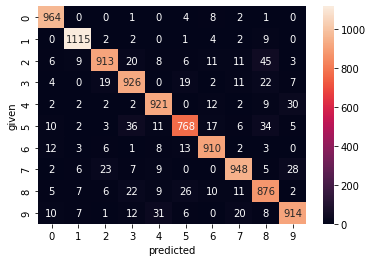

In [161]:
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('given')

Text(33.0, 0.5, 'given')

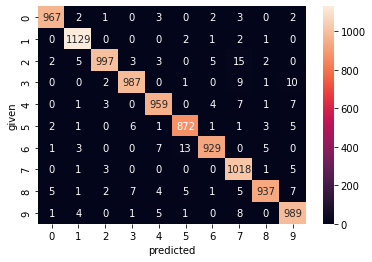

In [167]:
sns.heatmap(h_confusion_mat, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('given')